In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.feature_selection import RFE
import itertools
import seaborn as sns
import time
import pickle
from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, RepeatedKFold, cross_val_score
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import RepeatedStratifiedKFold, cross_validate
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report,mean_absolute_error,ConfusionMatrixDisplay  
import warnings
warnings.filterwarnings('ignore')

### Data Preprocessing 

In [2]:
dataset=pd.read_csv('CICIDS2017_sample.csv')

In [3]:
dataset.head()

,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,4,2,0,37,0,31,6,18.500000,17.677670,0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,142377,46,62,1325,105855,570,0,28.804348,111.407285,4344,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,118873,23,28,1169,45025,570,0,50.826087,156.137367,2896,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,143577,43,55,1301,107289,570,0,30.255814,115.178969,4344,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,143745,49,59,1331,110185,570,0,27.163265,108.067176,4344,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [4]:
dataset.shape

(56661, 78)

In [5]:
dataset.describe()

,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,...,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
count,5.666100e+04,56661.000000,56661.000000,5.666100e+04,5.666100e+04,56661.000000,56661.000000,56661.000000,56661.000000,56661.000000,...,56661.000000,56661.000000,5.666100e+04,5.666100e+04,5.666100e+04,5.666100e+04,5.666100e+04,5.666100e+04,5.666100e+04,5.666100e+04
mean,1.940740e+07,5.893348,5.441168,7.325051e+02,5.282417e+03,166.369390,10.105946,43.155072,57.334013,1552.609749,...,3.115794,26.955966,8.127717e+04,2.732128e+04,1.207459e+05,6.484220e+04,1.474432e+07,8.688159e+05,1.539940e+07,1.410650e+07
std,3.672377e+07,56.898685,66.513164,2.135208e+04,1.092694e+05,669.066176,47.856017,174.087067,224.747519,2773.907899,...,53.236039,6.796834,7.396278e+05,3.340568e+05,9.387816e+05,6.835563e+05,3.214172e+07,6.311718e+06,3.301473e+07,3.191101e+07
min,0.000000e+00,1.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,7.200000e+01,1.000000,1.000000,2.000000e+00,0.000000e+00,2.000000,0.000000,2.000000,0.000000,0.000000,...,0.000000,20.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,5.889700e+04,2.000000,2.000000,3.100000e+01,7.900000e+01,20.000000,0.000000,8.666667,0.000000,46.000000,...,1.000000,24.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,8.813192e+06,5.000000,5.000000,2.800000e+02,4.830000e+03,195.000000,6.000000,47.625000,78.488853,1460.000000,...,2.000000,32.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,1.200000e+08,6930.000000,9877.000000,2.866110e+06,2.150000e+07,23360.000000,1983.000000,5940.857143,7049.469004,11632.000000,...,5994.000000,60.000000,1.000000e+08,2.610000e+07,1.000000e+08,1.000000e+08,1.190000e+08,6.860000e+07,1.190000e+08,1.190000e+08


In [6]:
dataset.head()

,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,4,2,0,37,0,31,6,18.500000,17.677670,0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,142377,46,62,1325,105855,570,0,28.804348,111.407285,4344,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,118873,23,28,1169,45025,570,0,50.826087,156.137367,2896,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,143577,43,55,1301,107289,570,0,30.255814,115.178969,4344,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,143745,49,59,1331,110185,570,0,27.163265,108.067176,4344,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [7]:
dataset.groupby('Label').first()

,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,...,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
Label,,,,,,,,,,,,,,,,,,,,,
BENIGN,4,2,0,37,0,31,6,18.500000,17.677670,0,...,1,20,0.0,0.00000,0,0,0.0,0.00000,0,0
Bot,60202640,9,9,322,256,322,0,35.777778,107.333333,256,...,1,32,63678.2,22252.53596,103175,50911,10200000.0,34941.27201,10200000,10100000
BruteForce,80,1,1,0,0,0,0,0.000000,0.000000,0,...,0,32,0.0,0.00000,0,0,0.0,0.00000,0,0
DoS,8452090,4,0,24,0,6,6,6.000000,0.000000,0,...,3,20,786.0,0.00000,786,786,8451304.0,0.00000,8451304,8451304
Infiltration,42664070,5,6,141,291,93,0,28.200000,38.861292,267,...,4,20,0.0,0.00000,0,0,0.0,0.00000,0,0
PortScan,648,2,1,8,2,6,2,4.000000,2.828427,2,...,1,20,0.0,0.00000,0,0,0.0,0.00000,0,0
WebAttack,5185118,7,7,1022,2321,372,0,146.000000,184.078788,1047,...,3,32,0.0,0.00000,0,0,0.0,0.00000,0,0


In [8]:
dataset.groupby('Label').count()

,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,...,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
Label,,,,,,,,,,,,,,,,,,,,,
BENIGN,22731,22731,22731,22731,22731,22731,22731,22731,22731,22731,...,22731,22731,22731,22731,22731,22731,22731,22731,22731,22731
Bot,1966,1966,1966,1966,1966,1966,1966,1966,1966,1966,...,1966,1966,1966,1966,1966,1966,1966,1966,1966,1966
BruteForce,2767,2767,2767,2767,2767,2767,2767,2767,2767,2767,...,2767,2767,2767,2767,2767,2767,2767,2767,2767,2767
DoS,19035,19035,19035,19035,19035,19035,19035,19035,19035,19035,...,19035,19035,19035,19035,19035,19035,19035,19035,19035,19035
Infiltration,36,36,36,36,36,36,36,36,36,36,...,36,36,36,36,36,36,36,36,36,36
PortScan,7946,7946,7946,7946,7946,7946,7946,7946,7946,7946,...,7946,7946,7946,7946,7946,7946,7946,7946,7946,7946
WebAttack,2180,2180,2180,2180,2180,2180,2180,2180,2180,2180,...,2180,2180,2180,2180,2180,2180,2180,2180,2180,2180


In [9]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56661 entries, 0 to 56660
Data columns (total 78 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Flow Duration                56661 non-null  int64  
 1   Total Fwd Packets            56661 non-null  int64  
 2   Total Backward Packets       56661 non-null  int64  
 3   Total Length of Fwd Packets  56661 non-null  int64  
 4   Total Length of Bwd Packets  56661 non-null  int64  
 5   Fwd Packet Length Max        56661 non-null  int64  
 6   Fwd Packet Length Min        56661 non-null  int64  
 7   Fwd Packet Length Mean       56661 non-null  float64
 8   Fwd Packet Length Std        56661 non-null  float64
 9   Bwd Packet Length Max        56661 non-null  int64  
 10  Bwd Packet Length Min        56661 non-null  int64  
 11  Bwd Packet Length Mean       56661 non-null  float64
 12  Bwd Packet Length Std        56661 non-null  float64
 13  Flow Bytes/s    

In [10]:
dataset.columns

Index(['Flow Duration', 'Total Fwd Packets', 'Total Backward Packets',
       'Total Length of Fwd Packets', 'Total Length of Bwd Packets',
       'Fwd Packet Length Max', 'Fwd Packet Length Min',
       'Fwd Packet Length Mean', 'Fwd Packet Length Std',
       'Bwd Packet Length Max', 'Bwd Packet Length Min',
       'Bwd Packet Length Mean', 'Bwd Packet Length Std', 'Flow Bytes/s',
       'Flow Packets/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max',
       'Flow IAT Min', 'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std',
       'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean',
       'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags',
       'Bwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Length',
       'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s',
       'Min Packet Length', 'Max Packet Length', 'Packet Length Mean',
       'Packet Length Std', 'Packet Length Variance', 'FIN Flag Count',
       'SYN Flag Count', 'RST Flag Count', 'PS

In [11]:
dataset.columns = ['Flow Duration', 'Total Fwd Packets', 'Total Backward Packets',
       'Total Length of Fwd Packets', 'Total Length of Bwd Packets',
       'Fwd Packet Length Max', 'Fwd Packet Length Min',
       'Fwd Packet Length Mean', 'Fwd Packet Length Std',
       'Bwd Packet Length Max', 'Bwd Packet Length Min',
       'Bwd Packet Length Mean', 'Bwd Packet Length Std', 'Flow Bytes/s',
       'Flow Packets/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max',
       'Flow IAT Min', 'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std',
       'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean',
       'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags',
       'Bwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Length',
       'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s',
       'Min Packet Length', 'Max Packet Length', 'Packet Length Mean',
       'Packet Length Std', 'Packet Length Variance', 'FIN Flag Count',
       'SYN Flag Count', 'RST Flag Count', 'PSH Flag Count', 'ACK Flag Count',
       'URG Flag Count', 'CWE Flag Count', 'ECE Flag Count', 'Down/Up Ratio',
       'Average Packet Size', 'Avg Fwd Segment Size', 'Avg Bwd Segment Size',
       'Fwd Header Length.1', 'Fwd Avg Bytes/Bulk', 'Fwd Avg Packets/Bulk',
       'Fwd Avg Bulk Rate', 'Bwd Avg Bytes/Bulk', 'Bwd Avg Packets/Bulk',
       'Bwd Avg Bulk Rate', 'Subflow Fwd Packets', 'Subflow Fwd Bytes',
       'Subflow Bwd Packets', 'Subflow Bwd Bytes', 'Init_Win_bytes_forward',
       'Init_Win_bytes_backward', 'act_data_pkt_fwd', 'min_seg_size_forward',
       'Active Mean', 'Active Std', 'Active Max', 'Active Min', 'Idle Mean',
       'Idle Std', 'Idle Max', 'Idle Min', 'Label']

In [12]:
print ('BENIGN types: ', len(dataset.loc[dataset['Label']=='BENIGN']))
print ('Fraction of BENIGN types:', float(len(dataset.loc[dataset['Label']=='BENIGN'])/dataset.shape[0]))

BENIGN types:  22731
Fraction of BENIGN types: 0.40117541165881293


In [13]:
print ('DoS types: ', len(dataset.loc[dataset['Label']=='DoS']))
print ('Fraction of DoS types:', float(len(dataset.loc[dataset['Label']=='DoS'])/dataset.shape[0]))

DoS types:  19035
Fraction of DoS types: 0.3359453592418065


In [14]:
print ('Infiltration types: ', len(dataset.loc[dataset['Label']=='Infiltration']))
print ('Fraction of Infiltration types:', float(len(dataset.loc[dataset['Label']=='Infiltration'])/dataset.shape[0]))

Infiltration types:  36
Fraction of Infiltration types: 0.0006353576534124001


In [15]:

dataset=dataset.dropna(axis=0, how='any')
dataset=dataset.replace(',,', np.nan, inplace=False)

In [16]:
for i in dataset.columns:
    try:

        contains_infinity = np.isinf(dataset[i]).any()

        # Print the result
        print(i, contains_infinity)
    except:
        continue

Flow Duration False
Total Fwd Packets False
Total Backward Packets False
Total Length of Fwd Packets False
Total Length of Bwd Packets False
Fwd Packet Length Max False
Fwd Packet Length Min False
Fwd Packet Length Mean False
Fwd Packet Length Std False
Bwd Packet Length Max False
Bwd Packet Length Min False
Bwd Packet Length Mean False
Bwd Packet Length Std False
Flow Bytes/s True
Flow Packets/s True
Flow IAT Mean False
Flow IAT Std False
Flow IAT Max False
Flow IAT Min False
Fwd IAT Total False
Fwd IAT Mean False
Fwd IAT Std False
Fwd IAT Max False
Fwd IAT Min False
Bwd IAT Total False
Bwd IAT Mean False
Bwd IAT Std False
Bwd IAT Max False
Bwd IAT Min False
Fwd PSH Flags False
Bwd PSH Flags False
Fwd URG Flags False
Bwd URG Flags False
Fwd Header Length False
Bwd Header Length False
Fwd Packets/s False
Bwd Packets/s False
Min Packet Length False
Max Packet Length False
Packet Length Mean False
Packet Length Std False
Packet Length Variance False
FIN Flag Count False
SYN Flag Count Fa

In [17]:
dataset = dataset[dataset['Flow Bytes/s'] != "Infinity"]

In [18]:
dataset = dataset[dataset['Flow Packets/s'] != "Infinity"] 
dataset = dataset[dataset['Bwd Avg Bulk Rate'] != "Infinity"] 
dataset = dataset[dataset['Bwd Avg Packets/Bulk'] != "Infinity"] 
dataset = dataset[dataset['Bwd Avg Bytes/Bulk'] != "Infinity"] 
dataset = dataset[dataset['Fwd Avg Bulk Rate'] != "Infinity"] 
dataset = dataset[dataset['Fwd Avg Packets/Bulk'] != "Infinity"] 
dataset = dataset[dataset['Fwd Avg Bytes/Bulk'] != "Infinity"] 
dataset = dataset[dataset['CWE Flag Count'] != "Infinity"] 
dataset = dataset[dataset['Bwd URG Flags'] != "Infinity"] 
dataset = dataset[dataset['Bwd PSH Flags'] != "Infinity"] 
dataset = dataset[dataset['Fwd URG Flags'] != "Infinity"] 

In [19]:
dataset["Bwd Avg Bulk Rate"].replace(",,", np.nan, inplace=True)

In [20]:
dataset["Bwd Avg Bulk Rate"].replace(",,", np.nan, inplace=True)
dataset["Bwd Avg Packets/Bulk"].replace(",,", np.nan, inplace=True)
dataset["Bwd Avg Bytes/Bulk"].replace(",,", np.nan, inplace=True)
dataset["Fwd Avg Bulk Rate"].replace(",,", np.nan, inplace=True)
dataset["Fwd Avg Packets/Bulk"].replace(",,",np.nan, inplace=True)
dataset["Fwd Avg Bytes/Bulk"].replace(",,", np.nan, inplace=True)
dataset["CWE Flag Count"].replace(",,", np.nan, inplace=True)
dataset["Bwd URG Flags"].replace(",,", np.nan, inplace=True)
dataset["Bwd PSH Flags"].replace(",,", np.nan, inplace=True)
dataset["Fwd URG Flags"].replace(",,", np.nan, inplace=True)

In [21]:
dataset.dropna()

,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,4,2,0,37,0,31,6,18.500000,17.677670,0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,142377,46,62,1325,105855,570,0,28.804348,111.407285,4344,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,118873,23,28,1169,45025,570,0,50.826087,156.137367,2896,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,143577,43,55,1301,107289,570,0,30.255814,115.178969,4344,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,143745,49,59,1331,110185,570,0,27.163265,108.067176,4344,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56656,234,2,2,64,232,32,32,32.000000,0.000000,116,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
56657,133288,2,2,94,482,47,47,47.000000,0.000000,241,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
56658,11507694,5,4,450,3525,450,0,90.000000,201.246118,3525,...,32,893.0,0.0,893,893,6503640.0,0.0,6503640,6503640,DoS
56659,11507707,8,6,416,11632,416,0,52.000000,147.078211,5792,...,32,897.0,0.0,897,897,6503122.0,0.0,6503122,6503122,DoS


In [22]:
dataset['Flow Bytes/s'].replace(np.inf, 0,inplace=True)
dataset["Flow Packets/s"].replace(np.inf, 0, inplace=True)
dataset["Flow Packets/s"].replace(np.nan, 0, inplace=True)
dataset['Flow Bytes/s'].replace(np.nan, 0,inplace=True)


dataset["Bwd Avg Bulk Rate"].replace("Infinity", 0, inplace=True)
dataset["Bwd Avg Bulk Rate"].replace(",,", 0, inplace=True)
dataset["Bwd Avg Bulk Rate"].replace(np.nan, 0, inplace=True)

dataset["Bwd Avg Packets/Bulk"].replace("Infinity", 0, inplace=True)
dataset["Bwd Avg Packets/Bulk"].replace(",,", 0, inplace=True)
dataset["Bwd Avg Packets/Bulk"].replace(np.nan, 0, inplace=True)


dataset["Bwd Avg Bytes/Bulk"].replace("Infinity", 0, inplace=True)
dataset["Bwd Avg Bytes/Bulk"].replace(",,", 0, inplace=True)
dataset["Bwd Avg Bytes/Bulk"].replace(np.nan, 0, inplace=True)


dataset["Fwd Avg Bulk Rate"].replace("Infinity", 0, inplace=True)
dataset["Fwd Avg Bulk Rate"].replace(",,", 0, inplace=True)
dataset["Fwd Avg Bulk Rate"].replace(np.nan, 0, inplace=True)


dataset["Fwd Avg Packets/Bulk"].replace("Infinity", 0, inplace=True)
dataset["Fwd Avg Packets/Bulk"].replace(",,", 0, inplace=True)
dataset["Fwd Avg Packets/Bulk"].replace(np.nan, 0, inplace=True)


dataset["Fwd Avg Bytes/Bulk"].replace("Infinity", 0, inplace=True)
dataset["Fwd Avg Bytes/Bulk"].replace(",,", 0, inplace=True)
dataset["Fwd Avg Bytes/Bulk"].replace(np.nan, 0, inplace=True)


dataset["CWE Flag Count"].replace("Infinity", 0, inplace=True)
dataset["CWE Flag Count"].replace(",,", 0, inplace=True)
dataset["CWE Flag Count"].replace(np.nan, 0, inplace=True)

dataset["Bwd URG Flags"].replace("Infinity", 0, inplace=True)
dataset["Bwd URG Flags"].replace(",,", 0, inplace=True)
dataset["Bwd URG Flags"].replace(np.nan, 0, inplace=True)

dataset["Bwd PSH Flags"].replace("Infinity", 0, inplace=True)
dataset["Bwd PSH Flags"].replace(",,", 0, inplace=True)
dataset["Bwd PSH Flags"].replace(np.nan, 0, inplace=True)

dataset["Fwd URG Flags"].replace("Infinity", 0, inplace=True)
dataset["Fwd URG Flags"].replace(",,", 0, inplace=True)
dataset["Fwd URG Flags"].replace(np.nan, 0, inplace=True)

In [23]:
for i in dataset.columns:
    try:

        contains_infinity = np.isinf(dataset[i]).any()

        # Print the result
        print(i, contains_infinity)
    except:
        continue

Flow Duration False
Total Fwd Packets False
Total Backward Packets False
Total Length of Fwd Packets False
Total Length of Bwd Packets False
Fwd Packet Length Max False
Fwd Packet Length Min False
Fwd Packet Length Mean False
Fwd Packet Length Std False
Bwd Packet Length Max False
Bwd Packet Length Min False
Bwd Packet Length Mean False
Bwd Packet Length Std False
Flow Bytes/s False
Flow Packets/s False
Flow IAT Mean False
Flow IAT Std False
Flow IAT Max False
Flow IAT Min False
Fwd IAT Total False
Fwd IAT Mean False
Fwd IAT Std False
Fwd IAT Max False
Fwd IAT Min False
Bwd IAT Total False
Bwd IAT Mean False
Bwd IAT Std False
Bwd IAT Max False
Bwd IAT Min False
Fwd PSH Flags False
Bwd PSH Flags False
Fwd URG Flags False
Bwd URG Flags False
Fwd Header Length False
Bwd Header Length False
Fwd Packets/s False
Bwd Packets/s False
Min Packet Length False
Max Packet Length False
Packet Length Mean False
Packet Length Std False
Packet Length Variance False
FIN Flag Count False
SYN Flag Count 

In [24]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 56607 entries, 0 to 56660
Data columns (total 78 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Flow Duration                56607 non-null  int64  
 1   Total Fwd Packets            56607 non-null  int64  
 2   Total Backward Packets       56607 non-null  int64  
 3   Total Length of Fwd Packets  56607 non-null  int64  
 4   Total Length of Bwd Packets  56607 non-null  int64  
 5   Fwd Packet Length Max        56607 non-null  int64  
 6   Fwd Packet Length Min        56607 non-null  int64  
 7   Fwd Packet Length Mean       56607 non-null  float64
 8   Fwd Packet Length Std        56607 non-null  float64
 9   Bwd Packet Length Max        56607 non-null  int64  
 10  Bwd Packet Length Min        56607 non-null  int64  
 11  Bwd Packet Length Mean       56607 non-null  float64
 12  Bwd Packet Length Std        56607 non-null  float64
 13  Flow Bytes/s         

In [25]:
dataset["Flow Bytes/s"]=dataset["Flow Bytes/s"].astype("float64")
dataset['Flow Packets/s']=dataset["Flow Packets/s"].astype("float64")
dataset['Bwd Avg Bulk Rate']=dataset["Bwd Avg Bulk Rate"].astype("float64")
dataset['Bwd Avg Packets/Bulk']=dataset["Bwd Avg Packets/Bulk"].astype("float64")
dataset['Bwd Avg Bytes/Bulk']=dataset["Bwd Avg Bytes/Bulk"].astype("float64")
dataset['Fwd Avg Bulk Rate']=dataset["Fwd Avg Bulk Rate"].astype("float64")
dataset['Fwd Avg Packets/Bulk']=dataset["Fwd Avg Packets/Bulk"].astype("float64")
dataset['Fwd Avg Bytes/Bulk']=dataset["Fwd Avg Bytes/Bulk"].astype("float64")
dataset['CWE Flag Count']=dataset["CWE Flag Count"].astype("float64")
dataset['Bwd URG Flags']=dataset["Bwd URG Flags"].astype("float64")
dataset['Bwd PSH Flags']=dataset["Bwd PSH Flags"].astype("float64")
dataset['Fwd URG Flags']=dataset["Fwd URG Flags"].astype("float64")

In [26]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 56607 entries, 0 to 56660
Data columns (total 78 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Flow Duration                56607 non-null  int64  
 1   Total Fwd Packets            56607 non-null  int64  
 2   Total Backward Packets       56607 non-null  int64  
 3   Total Length of Fwd Packets  56607 non-null  int64  
 4   Total Length of Bwd Packets  56607 non-null  int64  
 5   Fwd Packet Length Max        56607 non-null  int64  
 6   Fwd Packet Length Min        56607 non-null  int64  
 7   Fwd Packet Length Mean       56607 non-null  float64
 8   Fwd Packet Length Std        56607 non-null  float64
 9   Bwd Packet Length Max        56607 non-null  int64  
 10  Bwd Packet Length Min        56607 non-null  int64  
 11  Bwd Packet Length Mean       56607 non-null  float64
 12  Bwd Packet Length Std        56607 non-null  float64
 13  Flow Bytes/s         

In [27]:
dataset['Label'].value_counts()

Label
BENIGN          22728
DoS             18984
PortScan         7946
BruteForce       2767
WebAttack        2180
Bot              1966
Infiltration       36
Name: count, dtype: int64

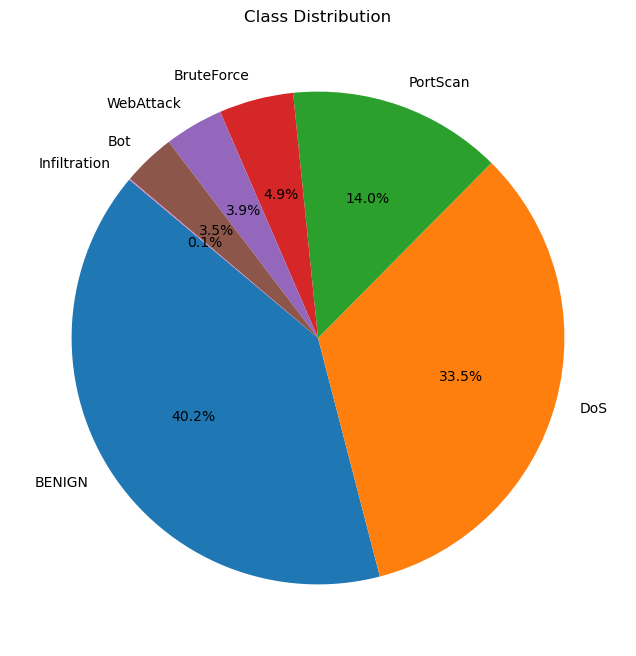

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

class_counts = dataset['Label'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Class Distribution')
plt.show()

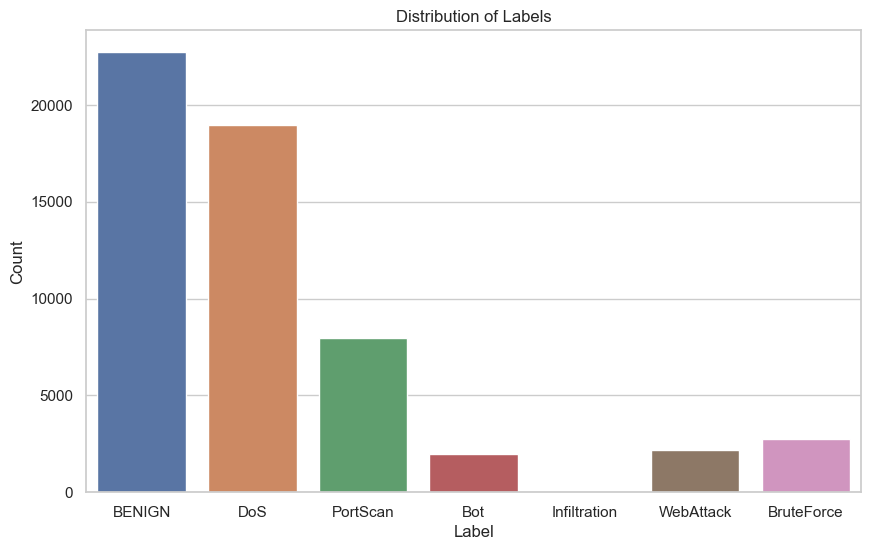

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for the plots
sns.set(style="whitegrid")

# Plot a histogram for the 'Label' distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='Label', data=dataset)
plt.title('Distribution of Labels')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()




In [30]:
np.unique(dataset['Label'].values)

array(['BENIGN', 'Bot', 'BruteForce', 'DoS', 'Infiltration', 'PortScan',
       'WebAttack'], dtype=object)

In [31]:
dataset.isnull().sum()

Flow Duration                  0
Total Fwd Packets              0
Total Backward Packets         0
Total Length of Fwd Packets    0
Total Length of Bwd Packets    0
                              ..
Idle Mean                      0
Idle Std                       0
Idle Max                       0
Idle Min                       0
Label                          0
Length: 78, dtype: int64

In [32]:
dataset

,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,4,2,0,37,0,31,6,18.500000,17.677670,0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,142377,46,62,1325,105855,570,0,28.804348,111.407285,4344,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,118873,23,28,1169,45025,570,0,50.826087,156.137367,2896,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,143577,43,55,1301,107289,570,0,30.255814,115.178969,4344,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,143745,49,59,1331,110185,570,0,27.163265,108.067176,4344,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56656,234,2,2,64,232,32,32,32.000000,0.000000,116,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
56657,133288,2,2,94,482,47,47,47.000000,0.000000,241,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
56658,11507694,5,4,450,3525,450,0,90.000000,201.246118,3525,...,32,893.0,0.0,893,893,6503640.0,0.0,6503640,6503640,DoS
56659,11507707,8,6,416,11632,416,0,52.000000,147.078211,5792,...,32,897.0,0.0,897,897,6503122.0,0.0,6503122,6503122,DoS


In [33]:
dataset_grouped=dataset.groupby(by='Label')
print(dataset_grouped.Label.count()) 

Label
BENIGN          22728
Bot              1966
BruteForce       2767
DoS             18984
Infiltration       36
PortScan         7946
WebAttack        2180
Name: Label, dtype: int64


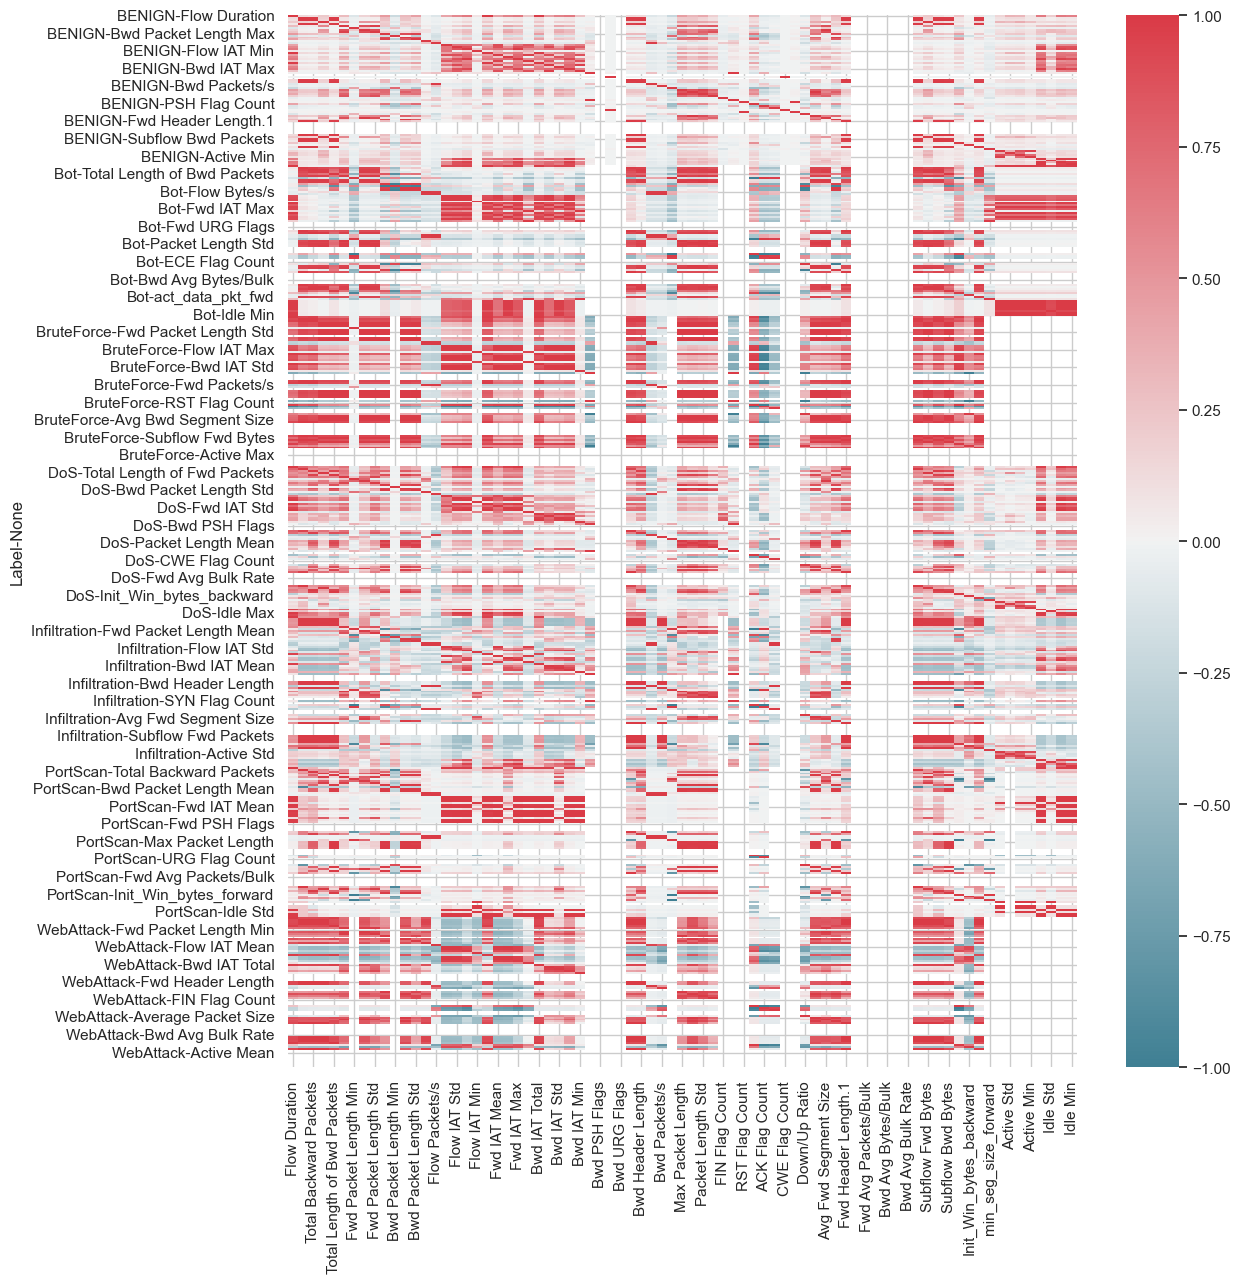

In [34]:
import seaborn as sns
cmap = sns.diverging_palette(220, 10, as_cmap=True) 

sns.set(style="whitegrid")

f, ax = plt.subplots(figsize=(13, 13))

sns.heatmap(dataset_grouped.corr(), cmap=cmap, annot=False)

f.tight_layout()

In [35]:
drop_cols = []
for i in dataset.columns:
    if len(dataset[i].unique())==1:
        drop_cols.append(i)
        print(i)
print("Total columns with only 1 unique value:", len(drop_cols))


Bwd PSH Flags
Bwd URG Flags
Fwd Avg Bytes/Bulk
Fwd Avg Packets/Bulk
Fwd Avg Bulk Rate
Bwd Avg Bytes/Bulk
Bwd Avg Packets/Bulk
Bwd Avg Bulk Rate
Total columns with only 1 unique value: 8


In [36]:
dataset.drop(labels=drop_cols,axis= 1, inplace=True)

In [37]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 56607 entries, 0 to 56660
Data columns (total 70 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Flow Duration                56607 non-null  int64  
 1   Total Fwd Packets            56607 non-null  int64  
 2   Total Backward Packets       56607 non-null  int64  
 3   Total Length of Fwd Packets  56607 non-null  int64  
 4   Total Length of Bwd Packets  56607 non-null  int64  
 5   Fwd Packet Length Max        56607 non-null  int64  
 6   Fwd Packet Length Min        56607 non-null  int64  
 7   Fwd Packet Length Mean       56607 non-null  float64
 8   Fwd Packet Length Std        56607 non-null  float64
 9   Bwd Packet Length Max        56607 non-null  int64  
 10  Bwd Packet Length Min        56607 non-null  int64  
 11  Bwd Packet Length Mean       56607 non-null  float64
 12  Bwd Packet Length Std        56607 non-null  float64
 13  Flow Bytes/s         

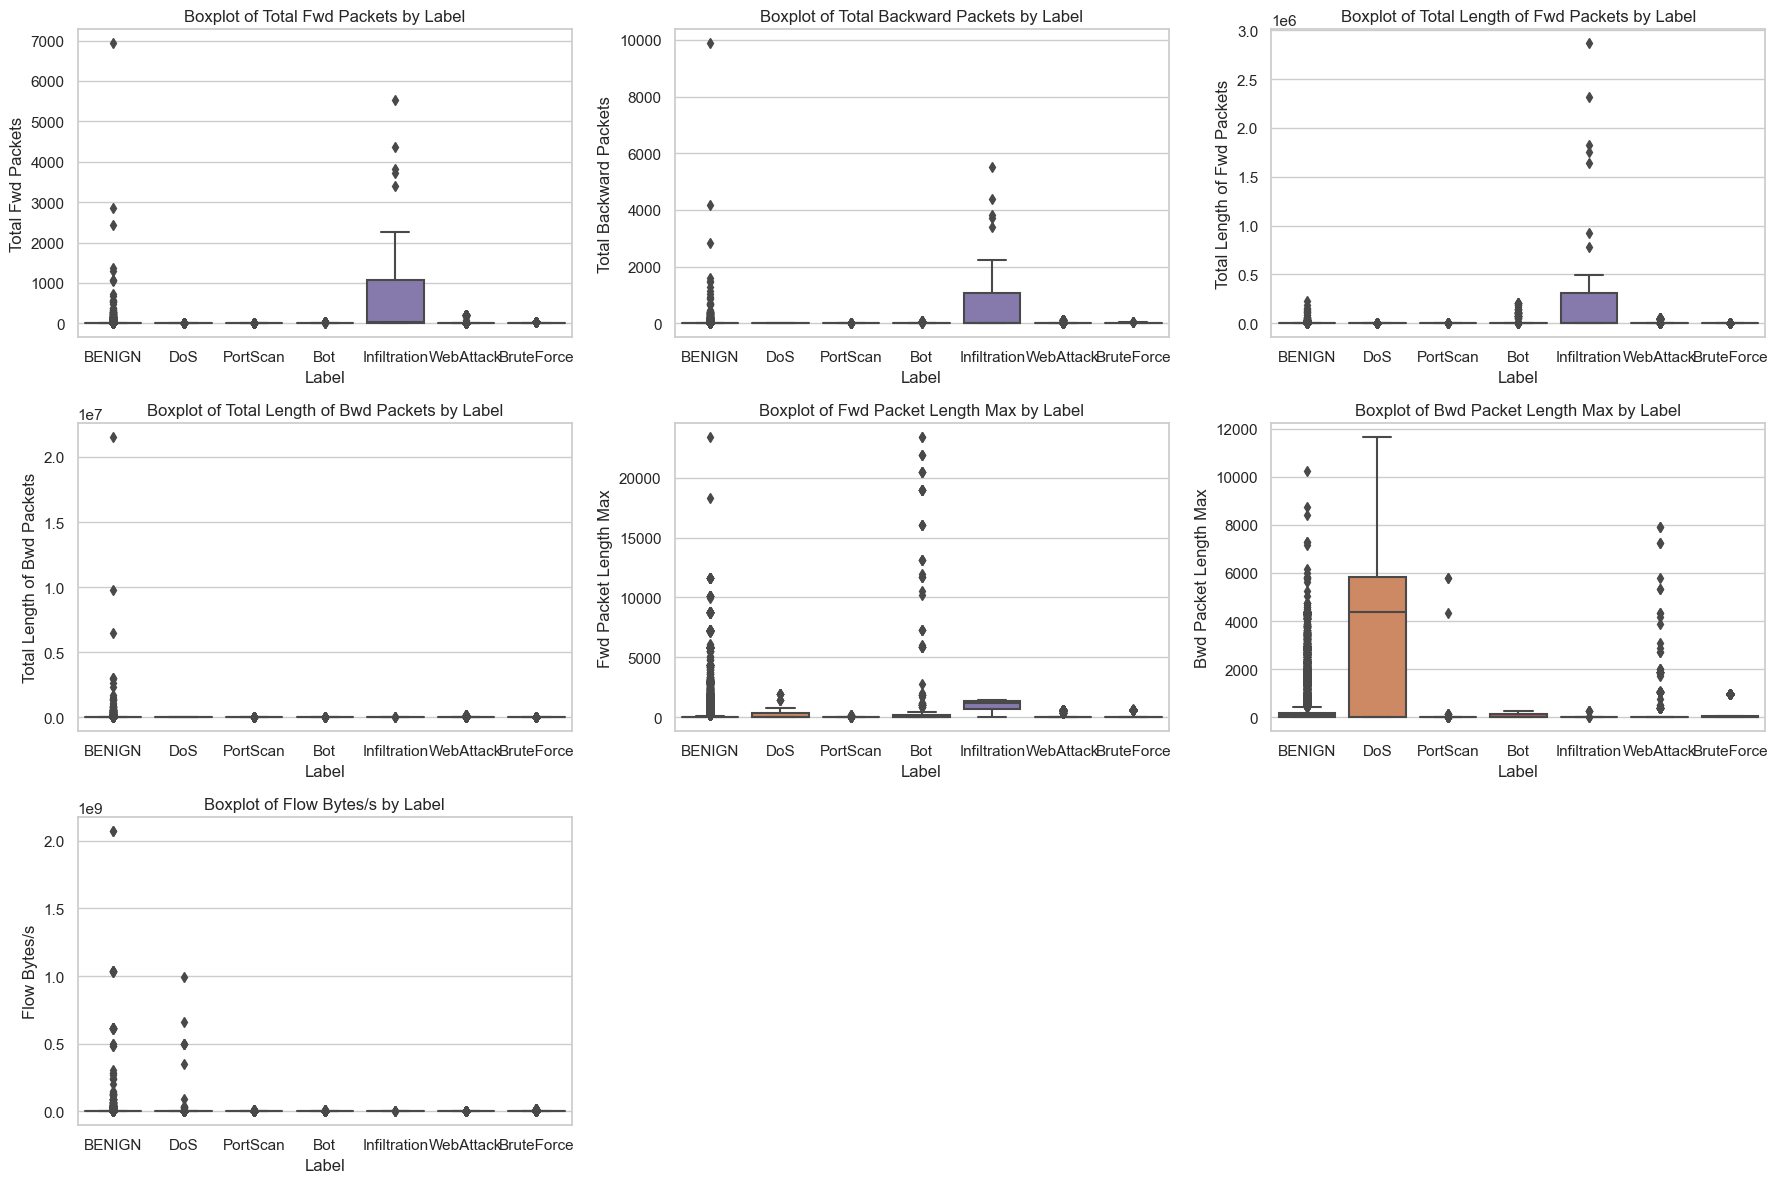

In [38]:
selected_features = ['Total Fwd Packets', 'Total Backward Packets', 'Total Length of Fwd Packets', 'Total Length of Bwd Packets', 'Fwd Packet Length Max', 'Bwd Packet Length Max', 'Flow Bytes/s']

plt.figure(figsize=(18, 12))
for i, feature in enumerate(selected_features, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x='Label', y=feature, data=dataset)
    plt.title(f'Boxplot of {feature} by Label')

plt.tight_layout()
plt.show()







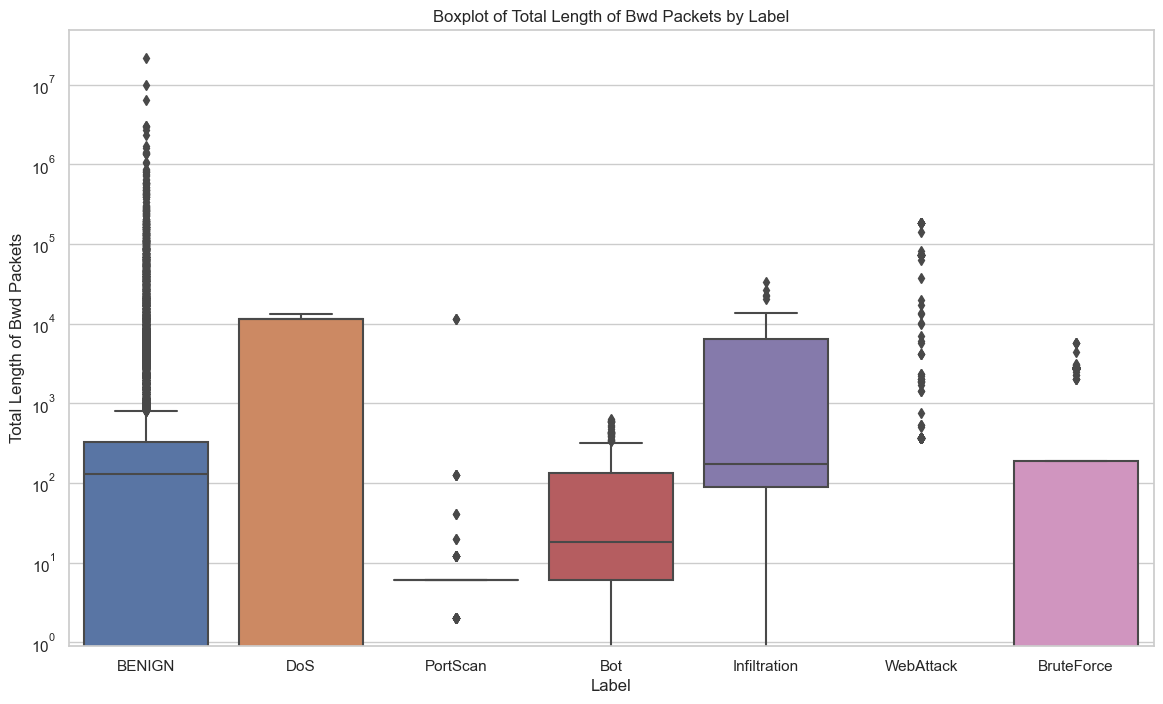

In [39]:
plt.figure(figsize=(14, 8))
sns.boxplot(x='Label', y='Total Length of Bwd Packets', data=dataset)
plt.yscale('log')  # Use log scale for better visibility
plt.title('Boxplot of Total Length of Bwd Packets by Label')
plt.xlabel('Label')
plt.ylabel('Total Length of Bwd Packets')
plt.show()

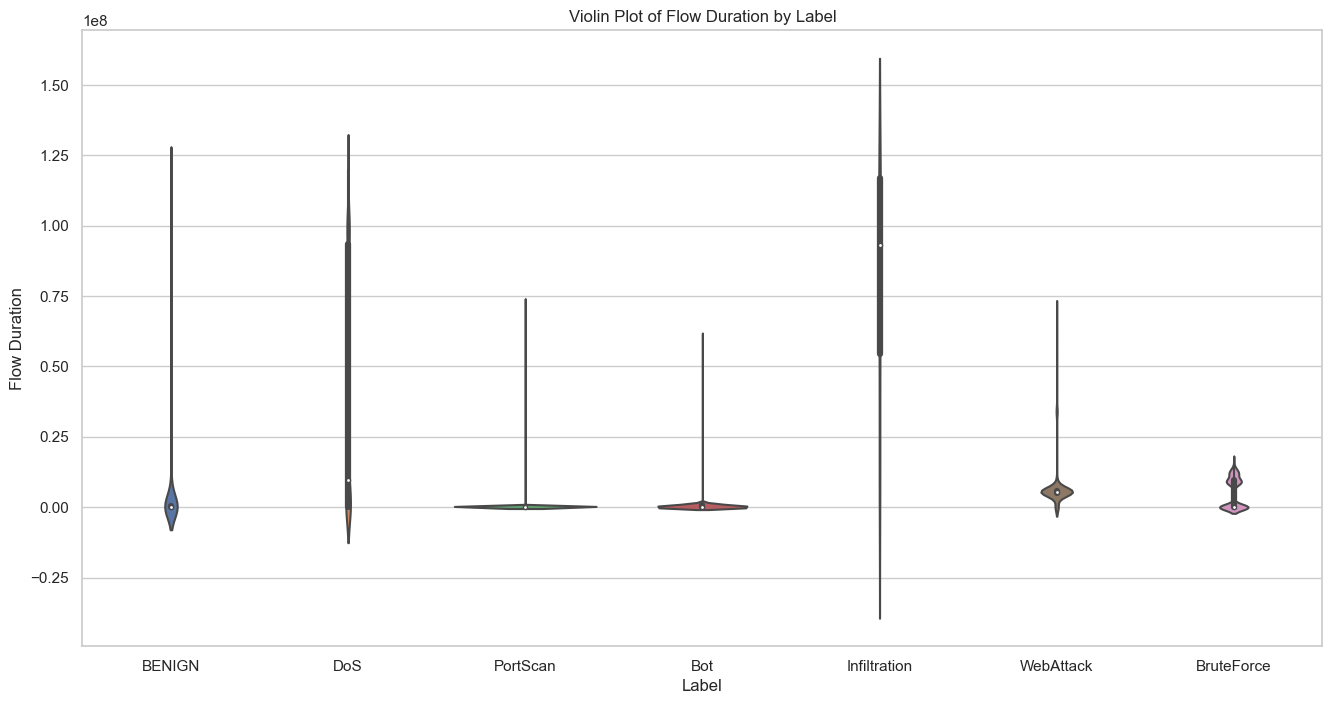

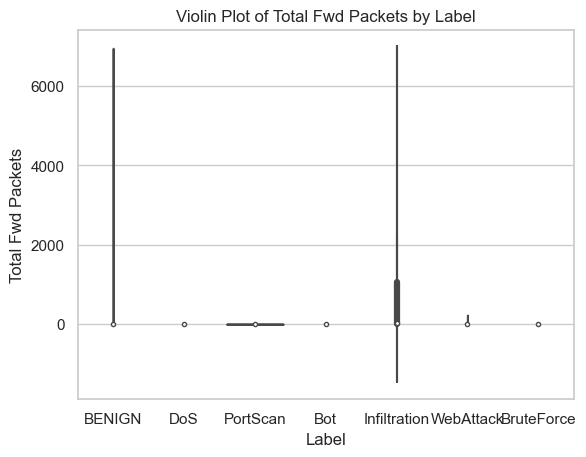

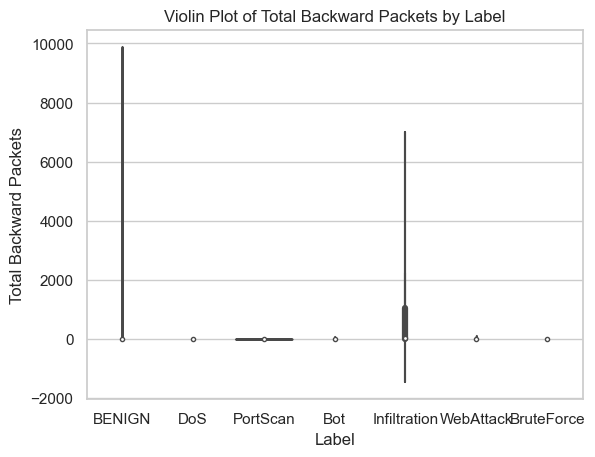

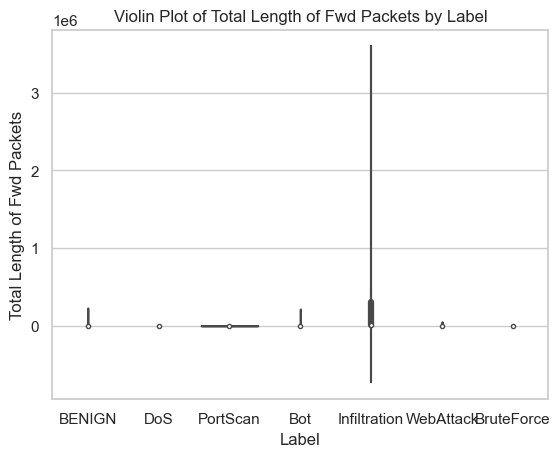

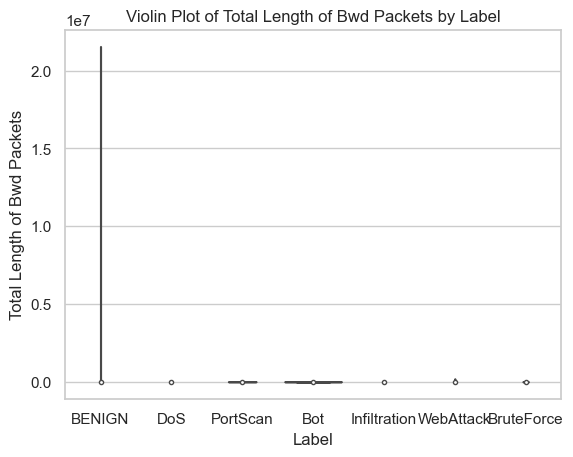

In [40]:
selected_features = ['Flow Duration', 'Total Fwd Packets', 'Total Backward Packets', 'Total Length of Fwd Packets', 'Total Length of Bwd Packets']
plt.figure(figsize=(16, 8))
for feature in selected_features:
    sns.violinplot(x='Label', y=feature, data=dataset)
    plt.title(f'Violin Plot of {feature} by Label')
    plt.xlabel('Label')
    plt.ylabel(feature)
    plt.show()


In [ ]:
num_features = dataset.select_dtypes(include=['float64', 'int64']).columns
for feature in num_features:
    plt.figure(figsize=(10, 6))
    sns.kdeplot(dataset[feature][dataset['Label'] == 0], label='BENIGN', fill=True)
    sns.kdeplot(dataset[feature][dataset['Label'] == 1], label='Bot', fill=True)
    sns.kdeplot(dataset[feature][dataset['Label'] == 2], label='DoS', fill=True)
    sns.kdeplot(dataset[feature][dataset['Label'] == 3], label='Infiltration', fill=True)
    sns.kdeplot(dataset[feature][dataset['Label'] == 4], label='PortScan', fill=True)
    sns.kdeplot(dataset[feature][dataset['Label'] == 5], label='WebAttack', fill=True)
    
    plt.title(f'Distribution of {feature} by Label')
    plt.xlabel(feature)
    plt.ylabel('Density')
    plt.legend()
    plt.show()

In [42]:
features = dataset.drop('Label', axis=1)
labels = dataset['Label']

In [43]:
#Scalling numerical attributes
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# extract numerical attributes and scale it to have zero mean and unit variance  
cols = features.select_dtypes(include=['float64','int64']).columns
sc_train = scaler.fit_transform(features.select_dtypes(include=['float64','int64']))
# turn the result back to a dataframe
feature = pd.DataFrame(sc_train, columns = cols)

In [44]:
feature.head()

,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,...,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
0,-0.528797,-0.068460,-0.081846,-0.032591,-0.048367,-0.202474,-0.085961,-0.141799,-0.176615,-0.560075,...,-0.039781,-1.022531,-0.109943,-0.081826,-0.128683,-0.094907,-0.458997,-0.137719,-0.466715,-0.442313
1,-0.524921,0.704485,0.849868,0.027703,0.919934,0.602773,-0.211281,-0.082634,0.240247,1.005448,...,0.504709,-1.022531,-0.109943,-0.081826,-0.128683,-0.094907,-0.458997,-0.137719,-0.466715,-0.442313
2,-0.525561,0.300446,0.338928,0.020400,0.363496,0.602773,-0.211281,0.043809,0.439184,0.483607,...,0.016546,0.742643,-0.109943,-0.081826,-0.128683,-0.094907,-0.458997,-0.137719,-0.466715,-0.442313
3,-0.524888,0.651784,0.744674,0.026580,0.933052,0.602773,-0.211281,-0.074300,0.257022,1.005448,...,0.429607,-1.022531,-0.109943,-0.081826,-0.128683,-0.094907,-0.458997,-0.137719,-0.466715,-0.442313
4,-0.524884,0.757185,0.804785,0.027984,0.959543,0.602773,-0.211281,-0.092057,0.225392,1.005448,...,0.523484,-1.022531,-0.109943,-0.081826,-0.128683,-0.094907,-0.458997,-0.137719,-0.466715,-0.442313


In [45]:
labels

0        BENIGN
1        BENIGN
2        BENIGN
3        BENIGN
4        BENIGN
          ...  
56656    BENIGN
56657    BENIGN
56658       DoS
56659       DoS
56660       DoS
Name: Label, Length: 56607, dtype: object

## Train Test Split

In [46]:
dataset.head()

,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,4,2,0,37,0,31,6,18.500000,17.677670,0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,142377,46,62,1325,105855,570,0,28.804348,111.407285,4344,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,118873,23,28,1169,45025,570,0,50.826087,156.137367,2896,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,143577,43,55,1301,107289,570,0,30.255814,115.178969,4344,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,143745,49,59,1331,110185,570,0,27.163265,108.067176,4344,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [47]:
import pandas as pd
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(feature, labels, test_size=0.3, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

In [48]:
len(X_train), len(y_train)

(39624, 39624)

In [49]:
X_train.head()

,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,...,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
12712,-0.528796,-0.086027,-0.066818,-0.034323,-0.048312,-0.248787,-0.211281,-0.248021,-0.255236,-0.557913,...,-0.058556,1.919425,-0.109943,-0.081826,-0.128683,-0.094907,-0.458997,-0.137719,-0.466715,-0.442313
51068,1.353048,0.001808,0.008320,-0.016721,0.057698,0.312944,-0.211281,0.111794,0.427460,2.049130,...,-0.039781,0.742643,-0.109937,-0.081826,-0.128678,-0.094899,1.686957,-0.137719,1.622500,1.719140
45277,-0.528797,-0.068460,-0.081846,-0.034323,-0.048367,-0.248787,-0.211281,-0.248021,-0.255236,-0.560075,...,-0.058556,0.742643,-0.109943,-0.081826,-0.128683,-0.094907,-0.458997,-0.137719,-0.466715,-0.442313
5570,-0.482530,-0.050893,-0.021735,-0.033106,0.057753,-0.218908,-0.211281,-0.198260,-0.209590,2.040121,...,-0.021005,-1.022531,-0.109943,-0.081826,-0.128683,-0.094907,-0.458997,-0.137719,-0.466715,-0.442313
6543,-0.478162,-0.050893,-0.006707,-0.033106,0.057808,-0.218908,-0.211281,-0.198260,-0.209590,2.566286,...,-0.021005,-1.022531,-0.109943,-0.081826,-0.128683,-0.094907,-0.458997,-0.137719,-0.466715,-0.442313


In [50]:
y_test.head()

19314    BENIGN
56379       DoS
2564        DoS
498         DoS
1226        DoS
Name: Label, dtype: object

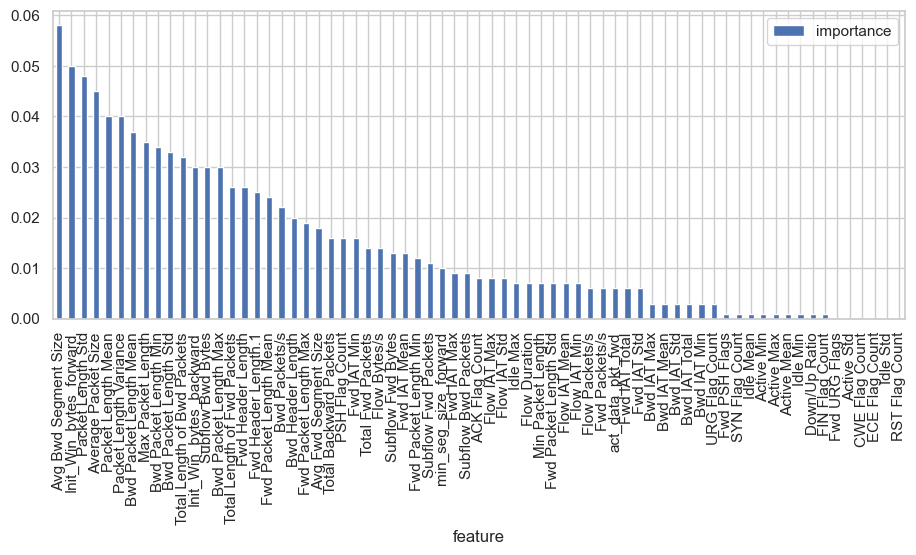

In [51]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier();

# fit random forest classifier on the training set
rfc.fit(X_train, y_train);

# extract important features
score = np.round(rfc.feature_importances_,3)
importances = pd.DataFrame({'feature':X_train.columns,'importance':score})
importances = importances.sort_values('importance',ascending=False).set_index('feature')

# plot importances
plt.rcParams['figure.figsize'] = (11, 4)
importances.plot.bar();

In [53]:
from sklearn.metrics import classification_report , confusion_matrix
rfc.fit(X_train, y_train);
predict = rfc.predict(X_test)
#y_predicted = np.round(predict)
#Confusion_Matrix = ConfusionMatrix(y_val, y_predicted)
#print(Confusion_Matrix)
print(classification_report(y_test, predict))

              precision    recall  f1-score   support

      BENIGN       1.00      0.99      0.99      3379
         Bot       0.97      0.99      0.98       315
  BruteForce       1.00      1.00      1.00       407
         DoS       1.00      1.00      1.00      2876
Infiltration       1.00      1.00      1.00         4
    PortScan       1.00      1.00      1.00      1179
   WebAttack       0.99      0.99      0.99       331

    accuracy                           1.00      8491
   macro avg       0.99      1.00      0.99      8491
weighted avg       1.00      1.00      1.00      8491



In [55]:
print(confusion_matrix(y_test, predict))

[[3357   11    0    5    0    2    4]
 [   2  313    0    0    0    0    0]
 [   1    0  406    0    0    0    0]
 [   6    0    0 2870    0    0    0]
 [   0    0    0    0    4    0    0]
 [   0    0    0    1    0 1178    0]
 [   3    0    0    0    0    0  328]]


In [56]:
#Recursive feature elimination
from sklearn.feature_selection import RFE
import itertools

rfc = RandomForestClassifier()

# create the RFE model and select 20 attributes
rfe = RFE(rfc, n_features_to_select=20)


In [57]:
rfe = rfe.fit(X_train, y_train)

In [58]:

# summarize the selection of the attributes
feature_map = [(i, v) for i, v in itertools.zip_longest(rfe.get_support(), X_train.columns)]
selected_features = [v for i, v in feature_map if i==True]



In [59]:
print(selected_features)

a = [i[0] for i in feature_map]
X_train = X_train.iloc[:,a]
X_test = X_test.iloc[:,a]

['Fwd Packet Length Max', 'Fwd Packet Length Mean', 'Bwd Packet Length Max', 'Bwd Packet Length Mean', 'Bwd Packet Length Std', 'Fwd IAT Min', 'Fwd Header Length', 'Bwd Header Length', 'Bwd Packets/s', 'Max Packet Length', 'Packet Length Mean', 'Packet Length Std', 'Packet Length Variance', 'Average Packet Size', 'Avg Fwd Segment Size', 'Avg Bwd Segment Size', 'Fwd Header Length.1', 'Subflow Bwd Bytes', 'Init_Win_bytes_forward', 'Init_Win_bytes_backward']


In [60]:
scorer = {
    'accuracy_score': metrics.make_scorer(metrics.accuracy_score),
    'precision_macro': metrics.make_scorer(metrics.precision_score, average='macro'),
    'recall_macro': metrics.make_scorer(metrics.recall_score, average='macro'),
    'f1_macro': metrics.make_scorer(metrics.f1_score, average='macro'),
    'matthew_corrcoef': metrics.make_scorer(metrics.matthews_corrcoef),
    'roc_auc_macro': metrics.make_scorer(metrics.roc_auc_score, multi_class='ovo', average='macro')
}
models = pd.DataFrame(columns=['model', 'run_time', 'avg_accy', 'avg_accy_std',
                                'avg_precision_macro', 'avg_precision_macro_std',
                                'avg_recall_macro', 'avg_recall_macro_std',
                                'avg_f1_macro', 'avg_f1_macro_std',
                                'avg_matthew_corcoef', 'avg_matthew_corcoef_std'])



In [63]:
classifiers = {
    'DecisionTreeClassifier': DecisionTreeClassifier(),
    'RandomForestClassifier': RandomForestClassifier(n_jobs=-1),
    'AdaBoostClassifier': AdaBoostClassifier(),
    "MLPClassifier":MLPClassifier(hidden_layer_sizes=(10,), max_iter=100),
    "LogisticRegression":LogisticRegression(max_iter=1000)}
models = pd.DataFrame(columns=['model', 'run_time', 'avg_accy', 'avg_accy_std',
                                'avg_precision_macro', 'avg_precision_macro_std',
                                'avg_recall_macro', 'avg_recall_macro_std',
                                'avg_f1_macro', 'avg_f1_macro_std',
                                'avg_matthew_corcoef', 'avg_matthew_corcoef_std'])


In [64]:
classifiers = {
    'DecisionTreeClassifier': DecisionTreeClassifier(),
    'RandomForestClassifier': RandomForestClassifier(n_jobs=-1),
    'AdaBoostClassifier': AdaBoostClassifier(),
    "MLPClassifier":MLPClassifier(hidden_layer_sizes=(10,), max_iter=100),
    "LogisticRegression":LogisticRegression(max_iter=1000)}
models = pd.DataFrame(columns=['model', 'run_time', 'avg_accy', 'avg_accy_std',
                                'avg_precision_macro', 'avg_precision_macro_std',
                                'avg_recall_macro', 'avg_recall_macro_std',
                                'avg_f1_macro', 'avg_f1_macro_std',
                                'avg_matthew_corcoef', 'avg_matthew_corcoef_std'])


scorer = {
    'accuracy_score': metrics.make_scorer(metrics.accuracy_score),
    'precision_macro': metrics.make_scorer(metrics.precision_score, average='macro'),
    'recall_macro': metrics.make_scorer(metrics.recall_score, average='macro'),
    'f1_macro': metrics.make_scorer(metrics.f1_score, average='macro'),
    'matthew_corrcoef': metrics.make_scorer(metrics.matthews_corrcoef),
    'roc_auc_macro': metrics.make_scorer(metrics.roc_auc_score, multi_class='ovo', average='macro')
}

# Loop through classifiers
for key in classifiers:
    print('*', key)
    
    # Start measuring the training time
    start_time = time.time()
    
    # Fit the model and perform cross-validation
    classifier = classifiers[key]
    model = classifier.fit(X_train, y_train)
    cvs = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)
    cv_results = cross_validate(model, X_test, y_test, cv=cvs, scoring=scorer)
    y_pred = model.predict(X_test)
    
    # Create a row for the DataFrame
    row = {
        'model': key,
        'run_time': format(round((time.time() - start_time) / 60, 2)),
        'avg_accy': cv_results['test_accuracy_score'].mean(),
        'avg_accy_std': cv_results['test_accuracy_score'].std(),
        'avg_precision_macro': cv_results['test_precision_macro'].mean(),
        'avg_precision_macro_std': cv_results['test_precision_macro'].std(),
        'avg_recall_macro': cv_results['test_recall_macro'].mean(),
        'avg_recall_macro_std': cv_results['test_recall_macro'].std(),
        'avg_f1_macro': cv_results['test_f1_macro'].mean(),
        'avg_f1_macro_std': cv_results['test_f1_macro'].std(),
        'avg_matthew_corcoef': cv_results['test_matthew_corrcoef'].mean(),
        'avg_matthew_corcoef_std': cv_results['test_matthew_corrcoef'].std()
    }
    
    # Concatenate the new row to the DataFrame
    models = pd.concat([models, pd.DataFrame([row])], ignore_index=True)
    
    # Save the trained model to a file
    with open(f'models/{key}.pkl', 'wb') as file:
        pickle.dump(model, file)

* DecisionTreeClassifier
* RandomForestClassifier
* AdaBoostClassifier
* MLPClassifier
* LogisticRegression


In [66]:
models

,model,run_time,avg_accy,avg_accy_std,avg_precision_macro,avg_precision_macro_std,avg_recall_macro,avg_recall_macro_std,avg_f1_macro,avg_f1_macro_std,avg_matthew_corcoef,avg_matthew_corcoef_std
0,DecisionTreeClassifier,0.05,0.989557,0.003258,0.965362,0.048489,0.969156,0.050047,0.967032,0.048993,0.985170,0.004619
1,RandomForestClassifier,0.19,0.993091,0.002033,0.979016,0.042743,0.976365,0.043055,0.977600,0.042788,0.990171,0.002894
2,AdaBoostClassifier,0.58,0.603698,0.113556,0.443246,0.149413,0.422818,0.131007,0.400433,0.133367,0.446312,0.163743
3,MLPClassifier,0.69,0.837789,0.014418,0.717116,0.078150,0.681137,0.066358,0.683247,0.070073,0.770379,0.021067
4,LogisticRegression,0.37,0.782633,0.010102,0.703643,0.074177,0.617835,0.048261,0.628476,0.045608,0.683316,0.014989


In [65]:
from tabulate import tabulate
model_rf = RandomForestClassifier(n_jobs=-1)

param_grid_rf = [{'n_estimators': [50, 100, 150],
                    'max_depth': [ 10, 20],
                    'min_samples_split': [2, 5],
                    'min_samples_leaf': [1,2],
                      'max_features': ['sqrt']}]

grid_search_rf = GridSearchCV(model_rf, param_grid=param_grid_rf, cv=10)
grid_search_rf = grid_search_rf.fit(X_train, y_train)
best_rf_model = grid_search_rf.best_estimator_
best_rf_params = grid_search_rf.best_params_
results = grid_search_rf.cv_results_
param_combinations = results['params']
mean_test_scores = results['mean_test_score']

# Prepare data for tabulation
table_data = []
for params, mean_score in zip(param_combinations, mean_test_scores):
    row = [mean_score]
    row.extend(params.values())
    table_data.append(row)

# Define table headers
headers = ['Mean Score', 'max_depth', 'max_features', 'min_samples_leaf', 'min_samples_split', 'n_estimators']

# Generate and print the table
table = tabulate(table_data, headers=headers)
print(table)


  Mean Score    max_depth  max_features      min_samples_leaf    min_samples_split    n_estimators
------------  -----------  --------------  ------------------  -------------------  --------------
    0.990056           10  sqrt                             1                    2              50
    0.989728           10  sqrt                             1                    2             100
    0.989703           10  sqrt                             1                    2             150
    0.98988            10  sqrt                             1                    5              50
    0.989627           10  sqrt                             1                    5             100
    0.989678           10  sqrt                             1                    5             150
    0.990006           10  sqrt                             2                    2              50
    0.989451           10  sqrt                             2                    2             100
    0.9892

In [67]:
best_rf_params

{'max_depth': 20,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 150}

In [ ]:
with open("best_rf_model.pkl", "wb") as file:
    pickle.dump(best_rf_model, file)